# Proyecto Final: Prediccion del cambio de direccion en cryptomonedas caso Bitcoin

Modelos Graficos Probabilisticos.

Carlos Emilio Carranza Avila

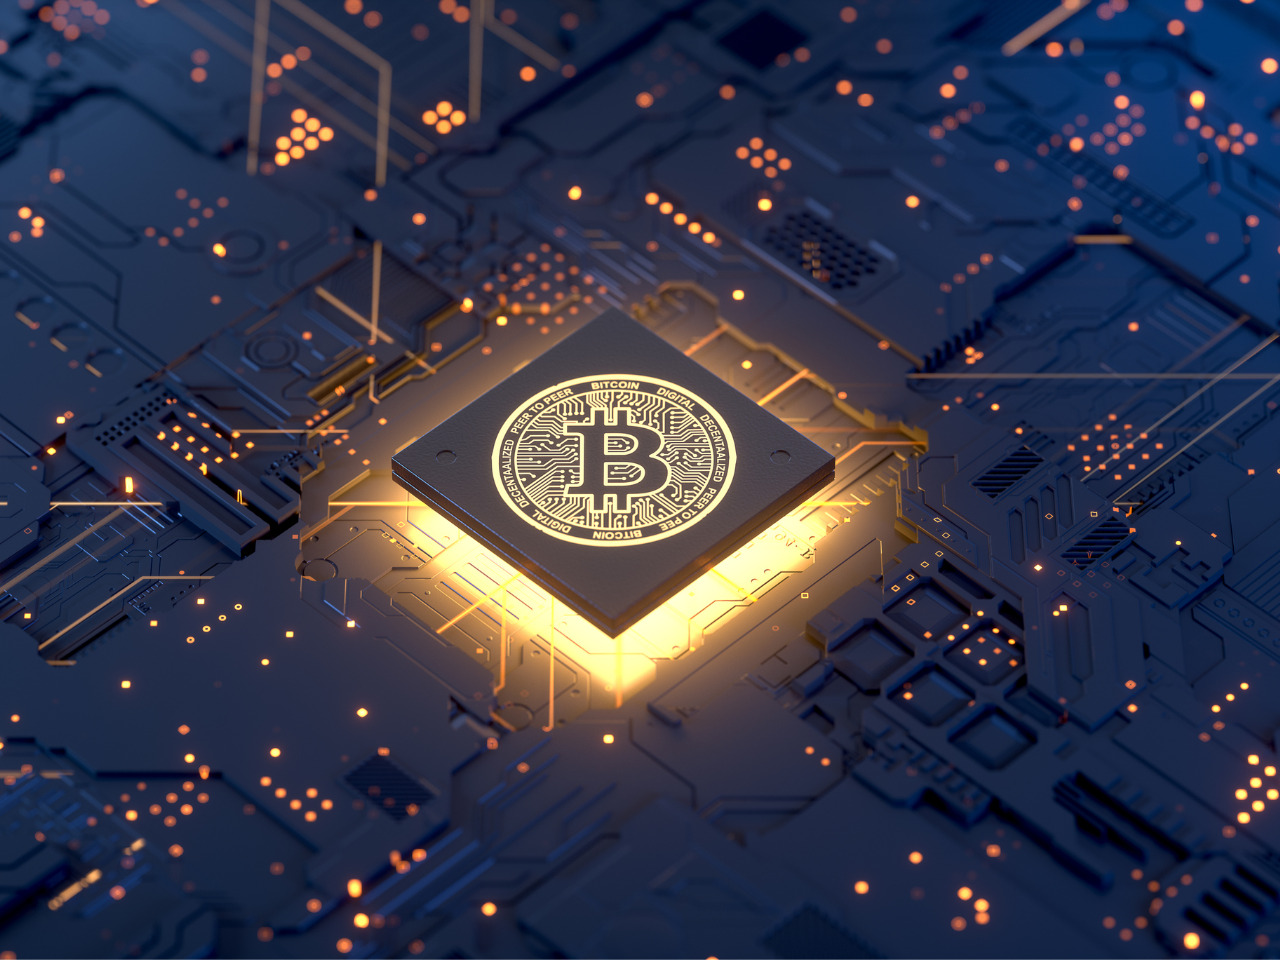

In [145]:
from IPython.display import Image
Image("3.jpg")

In [213]:
import Variablestest

<module 'Variablestest' from 'C:\\Users\\Emilio\\Desktop\\Thesis\\Variablestest.py'>

### Dataset de OHLCV Trades de Bitcoin
- El dataset esta recopilado a partir de CCXT y se descargan dos libros:
- Publictrades y Orderbook, estos se combinan para crear el OHLCV.
- Raw data es en centesimas de segundo y OHLCV se transformo a cada 3 segundos.
- El objetivo es el predecir los movimientos en tiempo T+1 como se puede ver en las columnas Sign y Sign t1

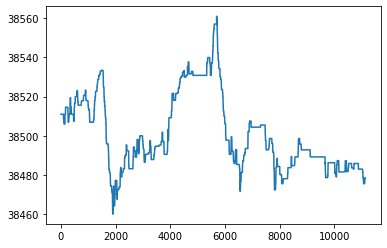

In [148]:
from IPython.display import Image
Image("pubtrade.png") # 11134  por hora , 185.5 promedio por minuto.

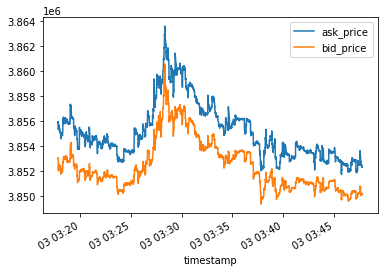

In [149]:
Image("orderbook.png") # 551800  entradas en una hora promedio 153 por segundo.

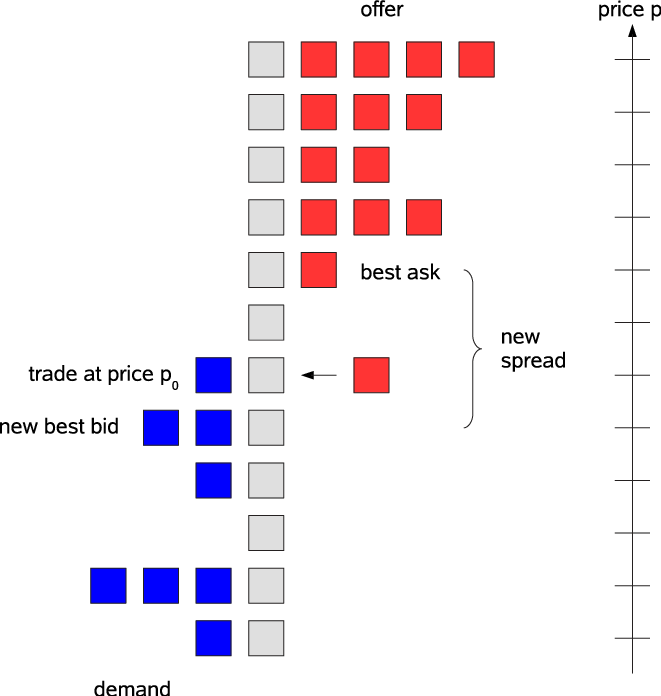

In [215]:
Image("ordbook.png")

In [150]:
ohlcv = pd.read_csv('ohlc2.csv')
ohlcv

,timestamp,open,high,low,close,volume,volatility,high_open,open_low,high_low,close_open,sign,sign_t1
0,2022-05-03 03:17:48,38558.760,38559.395,38555.500,38555.500,548.04558,3.895,0.635,3.260,3.895,-3.260,0,0.0
1,2022-05-03 03:17:51,38554.840,38557.180,38554.840,38556.545,659.20366,2.340,2.340,0.000,2.340,1.705,1,0.0
2,2022-05-03 03:17:54,38555.710,38555.710,38553.530,38553.555,525.56468,2.180,0.000,2.180,2.180,-2.155,0,1.0
3,2022-05-03 03:17:57,38553.530,38554.000,38553.075,38553.075,538.29700,0.925,0.470,0.455,0.925,-0.455,0,0.0
4,2022-05-03 03:18:00,38552.185,38553.075,38551.430,38552.185,563.00738,1.645,0.890,0.755,1.645,0.000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2022-05-03 03:47:33,38524.540,38535.755,38524.540,38532.935,545.18972,11.215,11.215,0.000,11.215,8.395,1,0.0
596,2022-05-03 03:47:36,38532.915,38532.935,38528.220,38528.470,567.04671,4.715,0.020,4.695,4.715,-4.445,0,1.0
597,2022-05-03 03:47:39,38528.220,38528.220,38525.070,38525.390,652.55257,3.150,0.000,3.150,3.150,-2.830,0,0.0
598,2022-05-03 03:47:42,38525.070,38525.390,38524.530,38524.530,549.04533,0.860,0.320,0.540,0.860,-0.540,0,0.0


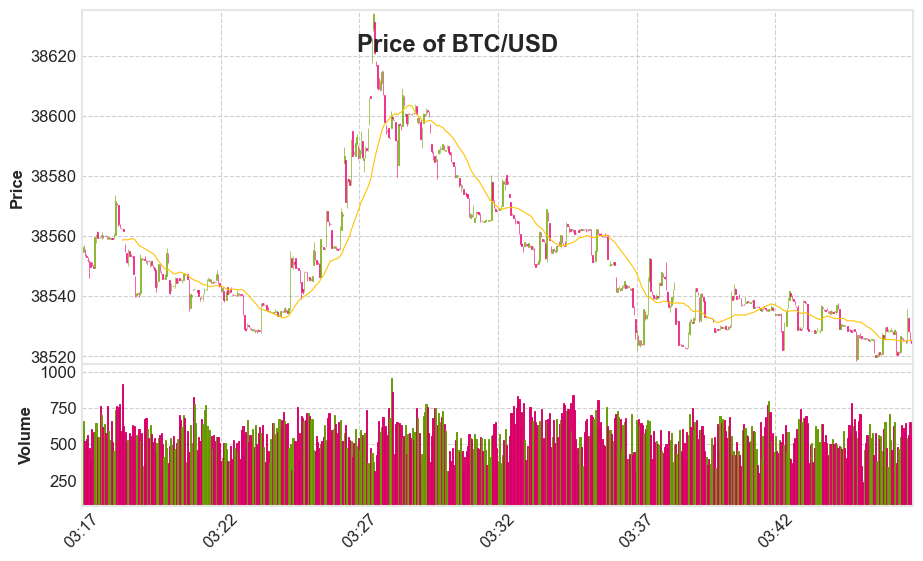

In [151]:
from IPython.display import Image
Image("download.png")

In [152]:
X = ohlcv.iloc[:, 4:-2]
y = ohlcv['sign']
y_true = y
X

,close,volume,volatility,high_open,open_low,high_low,close_open
0,38555.500,548.04558,3.895,0.635,3.260,3.895,-3.260
1,38556.545,659.20366,2.340,2.340,0.000,2.340,1.705
2,38553.555,525.56468,2.180,0.000,2.180,2.180,-2.155
3,38553.075,538.29700,0.925,0.470,0.455,0.925,-0.455
4,38552.185,563.00738,1.645,0.890,0.755,1.645,0.000
...,...,...,...,...,...,...,...
595,38532.935,545.18972,11.215,11.215,0.000,11.215,8.395
596,38528.470,567.04671,4.715,0.020,4.695,4.715,-4.445
597,38525.390,652.55257,3.150,0.000,3.150,3.150,-2.830
598,38524.530,549.04533,0.860,0.320,0.540,0.860,-0.540


In [153]:
#  Min Max Scaler
scale = MinMaxScaler()
X_scale = scale.fit(X)
X_scale = scale.transform(X)
X_scale = pd.DataFrame(X_scale,index = X.index, columns= X.columns)
X_scale

,close,volume,volatility,high_open,open_low,high_low,close_open
0,0.315270,0.429960,0.197066,0.032876,0.228692,0.197066,0.338308
1,0.324360,0.584897,0.118391,0.121149,0.000000,0.118391,0.491077
2,0.298352,0.398625,0.110296,0.000000,0.152929,0.110296,0.372308
3,0.294176,0.416372,0.046800,0.024333,0.031919,0.046800,0.424615
4,0.286435,0.450814,0.083228,0.046078,0.052964,0.083228,0.438615
...,...,...,...,...,...,...,...
595,0.118993,0.425979,0.567417,0.580637,0.000000,0.567417,0.696923
596,0.080155,0.456444,0.238553,0.001035,0.329358,0.238553,0.301846
597,0.053364,0.575627,0.159373,0.000000,0.220975,0.159373,0.351538
598,0.045884,0.431353,0.043511,0.016567,0.037881,0.043511,0.422000


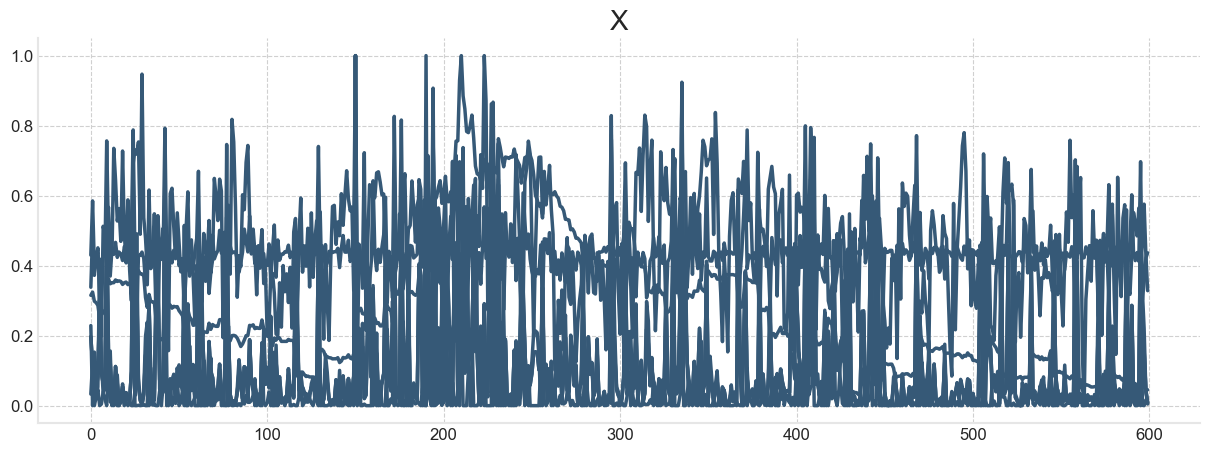

In [154]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
plt.title('X',size=20)
plt.plot(X_scale)


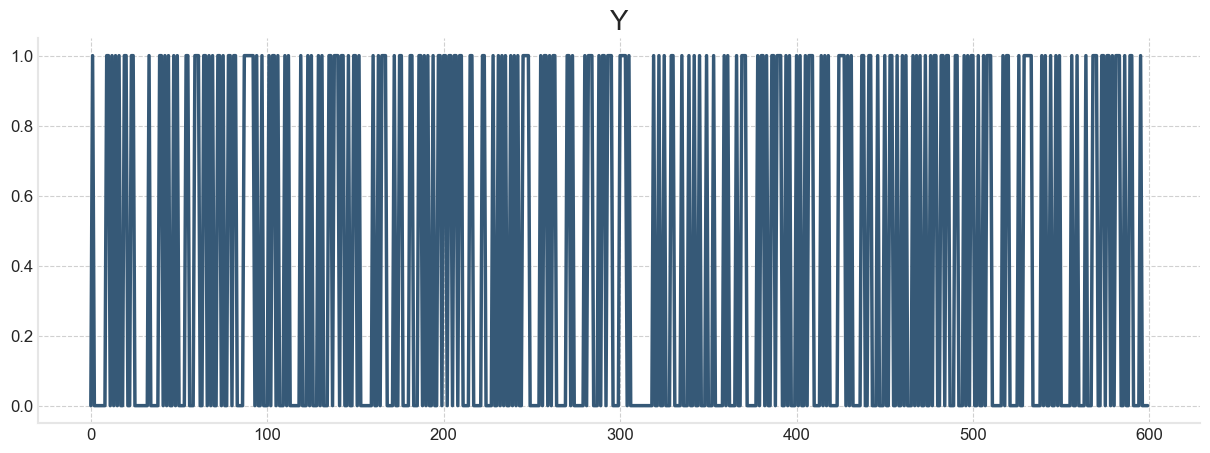

In [155]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
plt.title('Y',size=20)
plt.plot(y)

In [156]:
test_size = int(len(X)*.20)

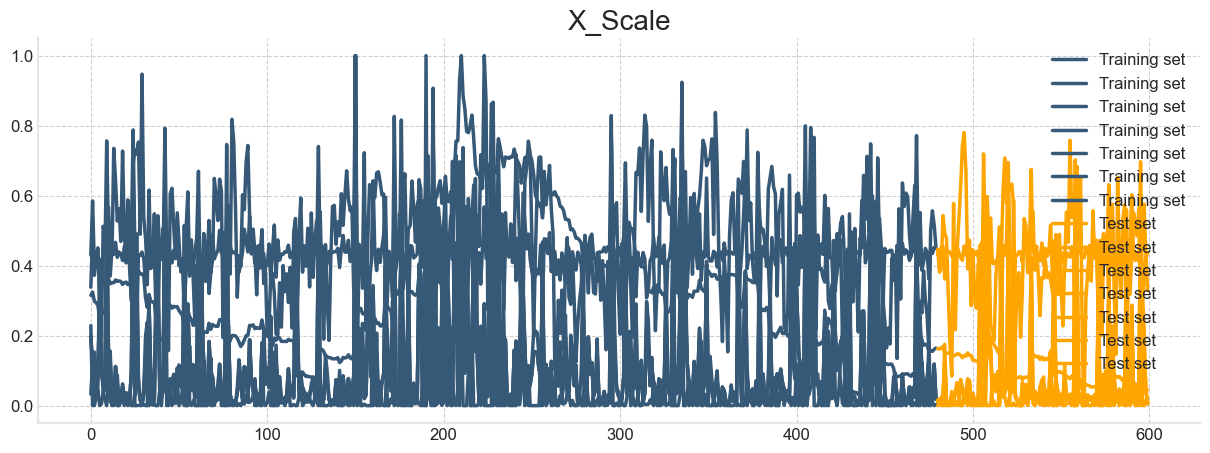

In [157]:
X_train = X_scale[:-test_size]
X_test = X_scale[-test_size:]

plt.title('X_Scale', size=20)
plt.plot(X_train, label='Training set')
plt.plot(X_test, label='Test set', color='orange')
plt.legend();

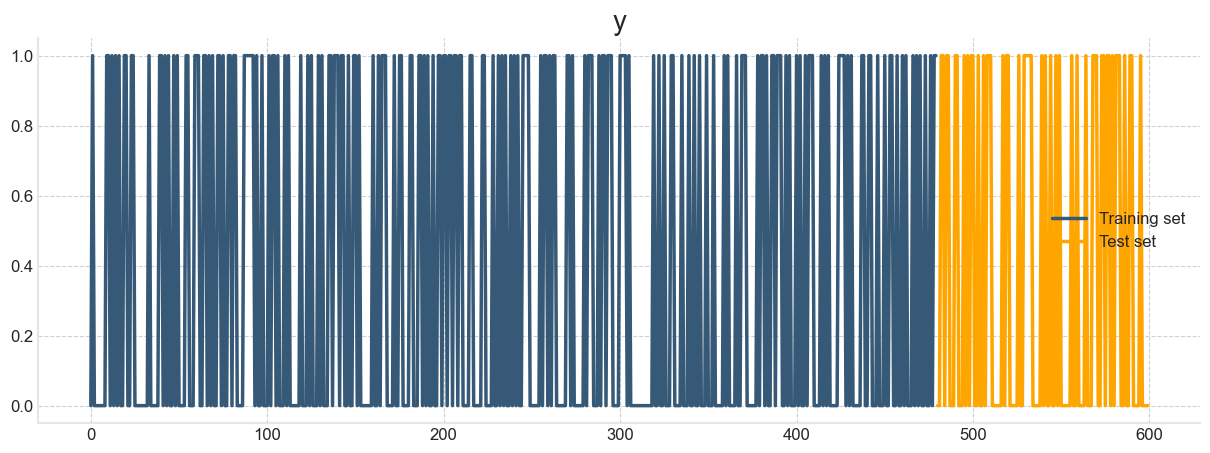

In [158]:
y_train = y[:-test_size]
y_test = y[-test_size:]

plt.title('y', size=20)
plt.plot(y_train, label='Training set')
plt.plot(y_test, label='Test set', color='orange')
plt.legend();

# Modelo Naive Bayes

In [159]:
X_train.shape, X_test.shape

((480, 7), (120, 7))

In [160]:
import category_encoders as ce

In [161]:
X_train.head()

,close,volume,volatility,high_open,open_low,high_low,close_open
0,0.315270,0.429960,0.197066,0.032876,0.228692,0.197066,0.338308
1,0.324360,0.584897,0.118391,0.121149,0.000000,0.118391,0.491077
2,0.298352,0.398625,0.110296,0.000000,0.152929,0.110296,0.372308
3,0.294176,0.416372,0.046800,0.024333,0.031919,0.046800,0.424615
4,0.286435,0.450814,0.083228,0.046078,0.052964,0.083228,0.438615


In [178]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()
pgmpy


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [177]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [179]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7583


In [180]:
y_pred_train = gnb.predict(X_train)

In [181]:
conf_mat = confusion_matrix(y_test, y_pred)

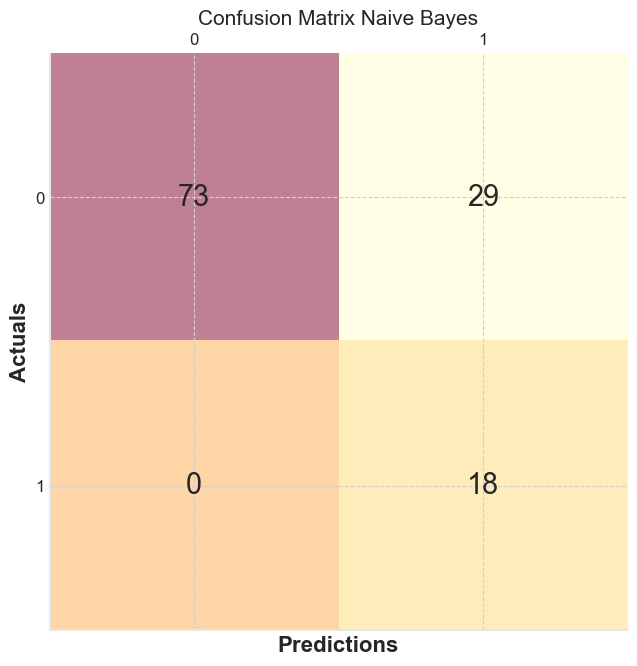

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(conf_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(conf_mat.shape[0]):
    for n in range(conf_mat.shape[1]):
        px.text(x=m,y=n,s=conf_mat[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix Naive Bayes', fontsize=15)
plt.show()

# Benchmark: Martingala y Regresion Logistica

In [1]:
# model fit
logistic_model = LogisticRegression(random_state=None, penalty='elasticnet',
                                    solver='saga', l1_ratio=1, max_iter=4000)
logistic_model.fit(X_train, y_train)

# logistic_model.predict_proba((X[:2, :])
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
logistic_model.score(X_scale, y)
confusion_mat = confusion_matrix(y_test, y_pred)

NameError: name 'LogisticRegression' is not defined

In [169]:
# logistic_model.predict_proba((X[:2, :])
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
logistic_model.score(X_scale, y)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy is", accuracy)

Accuracy is 88.33333333333333


In [183]:
accuracy_martingala = accuracy_score(ohlcv['sign'], ohlcv['sign_t1']) * 100
print(accuracy_martingala)
confusion_mart=confusion_matrix(ohlcv['sign'], ohlcv['sign_t1'])
confusion_mart

49.0


array([[212, 153],
       [153,  82]], dtype=int64)

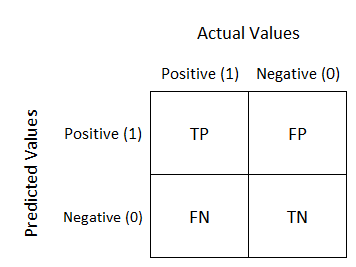

In [171]:
Image('conf.png')

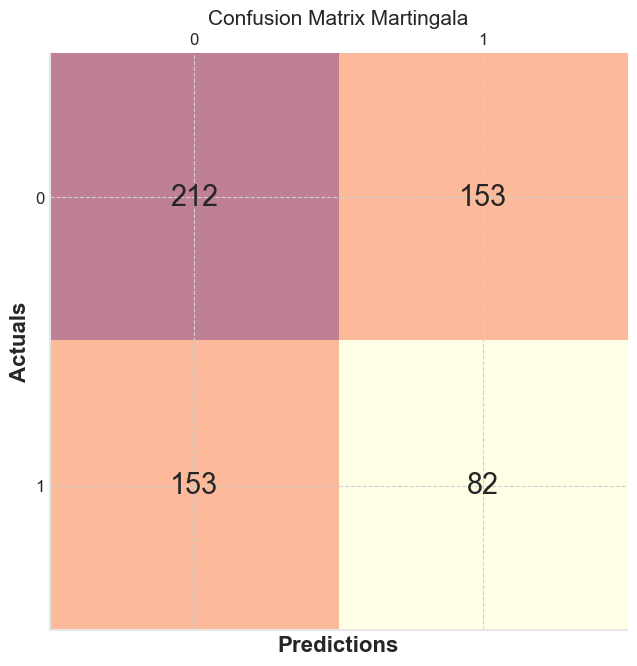

In [185]:
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(confusion_mart, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mart.shape[0]):
    for n in range(confusion_mart.shape[1]):
        px.text(x=m,y=n,s=confusion_mart[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix Martingala', fontsize=15)
plt.show()

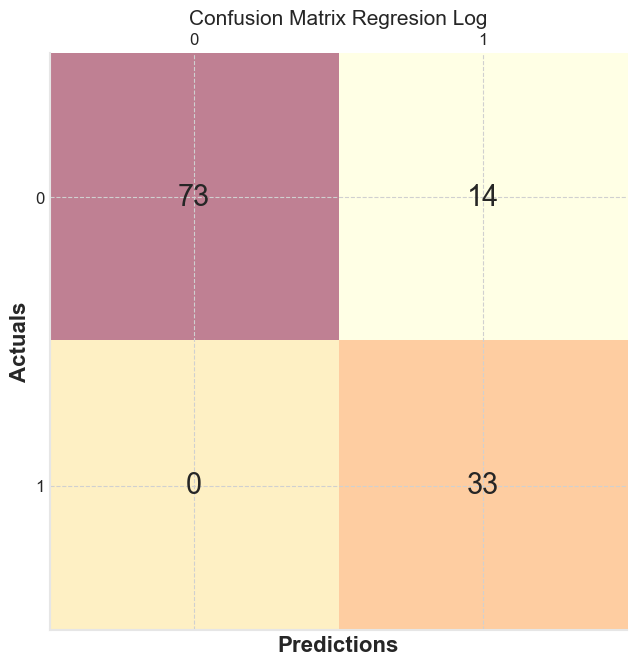

In [173]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(confusion_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mat.shape[0]):
    for n in range(confusion_mat.shape[1]):
        px.text(x=m,y=n,s=confusion_mat[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix Regresion Log', fontsize=15)
plt.show()

# Resultados:

- Modelo Martingala tuvo el menor rendimiento.
- Regresion Logistica tuvo el mayor numero de valores verdaderos.

$$
\begin{aligned}
& \text {Table 1.1. Resultados diferentes modelos }\\
&\begin{array}{cccc}
\hline \hline \text { Modelo } & \text { Certeza } & \text { TP} & \text { FP} & \text { FN}& \text { TN}\\
\hline Naive Bayes &0.7583 & 73 & 29 & 0 &18 \\
Martingala & .49 & 212 & 153 & 153 & 82\\
Regresion Logistica & .8833333333333333 & 73 & 14 & 0 & 33\\
\hline
\end{array}
\end{aligned}
$$

- En el TOC se esta explorando el usar una regresion simbolica creando nuevas variables subyacentes, por lo que se propone correr el modelo naive sobre esas nuevas variables.

- Se debe de revisar si no existe leakeo de datos, que puede ocurrir trabajando con series de tiempo y afecta los resultados dando niveles de certeza mas altos.